# importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and understanding data

In [2]:
data = pd.read_csv("cardio_train.csv",sep=';',decimal=',')

data.index = data.iloc[:,0]
df = data.iloc[:,1:]

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df['weight']=df['weight'].apply(lambda x: float(x))

In [5]:
df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.shape

(70000, 12)

here we will get some understanding of data and type of data available.Now we will see correlation in our data and see how data is coorelated with each other

# Feature Selection

In [8]:
(df.corr())

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


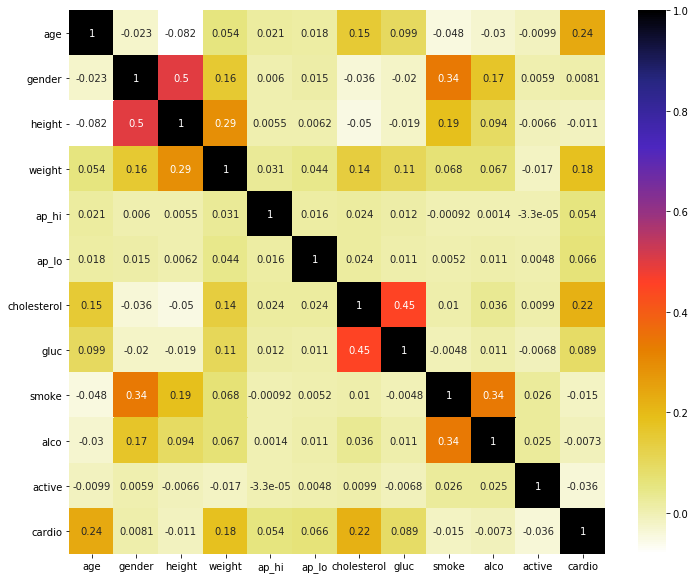

In [9]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

0

In [12]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
varconvert=pd.get_dummies(df["gender"],prefix='Gender')
varconvert1=pd.get_dummies(df["cholesterol"],prefix='cholesterol')
varconvert2=pd.get_dummies(df["smoke"],prefix='smoke')
varconvert3=pd.get_dummies(df["alco"],prefix='alco')
varconvert4=pd.get_dummies(df["active"],prefix='active')
varconvert5=pd.get_dummies(df["gluc"],prefix='gluc')

In [14]:
dataset=pd.concat([varconvert,df],axis=1)
dataset=pd.concat([varconvert1,dataset],axis=1)
dataset=pd.concat([varconvert2,dataset],axis=1)
dataset=pd.concat([varconvert3,dataset],axis=1)
dataset=pd.concat([varconvert4,dataset],axis=1)
dataset=pd.concat([varconvert5,dataset],axis=1)
dataset.drop(['gender', 'cholesterol','smoke','alco','active','gluc'], axis=1, inplace=True)

In [15]:
dataset.columns

Index(['gluc_1', 'gluc_2', 'gluc_3', 'active_0', 'active_1', 'alco_0',
       'alco_1', 'smoke_0', 'smoke_1', 'cholesterol_1', 'cholesterol_2',
       'cholesterol_3', 'Gender_1', 'Gender_2', 'age', 'height', 'weight',
       'ap_hi', 'ap_lo', 'cardio'],
      dtype='object')

In [16]:
dataset

,gluc_1,gluc_2,gluc_3,active_0,active_1,alco_0,alco_1,smoke_0,smoke_1,cholesterol_1,cholesterol_2,cholesterol_3,Gender_1,Gender_2,age,height,weight,ap_hi,ap_lo,cardio
id,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,18393,168,62.0,110,80,0
1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,20228,156,85.0,140,90,1
2,1,0,0,1,0,1,0,1,0,0,0,1,1,0,18857,165,64.0,130,70,1
3,1,0,0,0,1,1,0,1,0,1,0,0,0,1,17623,169,82.0,150,100,1
4,1,0,0,1,0,1,0,1,0,1,0,0,1,0,17474,156,56.0,100,60,0
8,0,1,0,1,0,1,0,1,0,0,1,0,1,0,21914,151,67.0,120,80,0
9,1,0,0,0,1,1,0,1,0,0,0,1,1,0,22113,157,93.0,130,80,0
12,0,0,1,0,1,1,0,1,0,0,0,1,0,1,22584,178,95.0,130,90,1
13,1,0,0,0,1,1,0,1,0,1,0,0,1,0,17668,158,71.0,110,70,0


# Splitting data into x and y

In [17]:
dataset_x = dataset.iloc[:, 0:19]
dataset_y=dataset.iloc[:,19]

In [18]:
dataset_x

,gluc_1,gluc_2,gluc_3,active_0,active_1,alco_0,alco_1,smoke_0,smoke_1,cholesterol_1,cholesterol_2,cholesterol_3,Gender_1,Gender_2,age,height,weight,ap_hi,ap_lo
id,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,18393,168,62.0,110,80
1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,20228,156,85.0,140,90
2,1,0,0,1,0,1,0,1,0,0,0,1,1,0,18857,165,64.0,130,70
3,1,0,0,0,1,1,0,1,0,1,0,0,0,1,17623,169,82.0,150,100
4,1,0,0,1,0,1,0,1,0,1,0,0,1,0,17474,156,56.0,100,60
8,0,1,0,1,0,1,0,1,0,0,1,0,1,0,21914,151,67.0,120,80
9,1,0,0,0,1,1,0,1,0,0,0,1,1,0,22113,157,93.0,130,80
12,0,0,1,0,1,1,0,1,0,0,0,1,0,1,22584,178,95.0,130,90
13,1,0,0,0,1,1,0,1,0,1,0,0,1,0,17668,158,71.0,110,70


# Scaling and Train test split

In [19]:
from sklearn.preprocessing  import MinMaxScaler
scalar=MinMaxScaler()
dataset_x=scalar.fit_transform(dataset_x) 
dataset_x

array([[1.        , 0.        , 0.        , ..., 0.27368421, 0.01607916,
        0.01355014],
       [1.        , 0.        , 0.        , ..., 0.39473684, 0.01793445,
        0.01445348],
       [1.        , 0.        , 0.        , ..., 0.28421053, 0.01731602,
        0.01264679],
       ...,
       [1.        , 0.        , 0.        , ..., 0.5       , 0.02040816,
        0.01445348],
       [0.        , 1.        , 0.        , ..., 0.32631579, 0.01762523,
        0.01355014],
       [1.        , 0.        , 0.        , ..., 0.32631579, 0.01669759,
        0.01355014]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.35)

# Random Forest Algorithm and evalution

In [21]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [22]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, y_pred))

Confusion matrix
[[8955 3425]
 [3626 8494]]
classification_report
              precision    recall  f1-score   support

           0       0.71      0.72      0.72     12380
           1       0.71      0.70      0.71     12120

    accuracy                           0.71     24500
   macro avg       0.71      0.71      0.71     24500
weighted avg       0.71      0.71      0.71     24500



# Decision Tree Algorithm and evalution

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72     12380
           1       0.71      0.70      0.71     12120

    accuracy                           0.71     24500
   macro avg       0.71      0.71      0.71     24500
weighted avg       0.71      0.71      0.71     24500



# Knn Algorithm and evalution

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
pre=classifier.predict(X_test)
print(confusion_matrix(y_test, pre))
print(f1_score(y_test,pre))
pre=clf.predict(X_train)
print(confusion_matrix(y_train, pre))
print(f1_score(y_train,pre))

[[7498 4882]
 [4805 7315]]
0.6016367150553111
[[22640     1]
 [    4 22855]]
0.9998906267089578
